In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_excel('customer_data.xlsx')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
df.isnull().sum()/len(df)

age               0.000000
workclass         0.019717
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.019778
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.005610
income            0.000000
dtype: float64

In [5]:
df['workclass'].mode()
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [6]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [7]:
le = LabelEncoder()


df['sex'] = pd.get_dummies(df['sex'],drop_first=True,dtype='int')


In [8]:
df['native-country'] = le.fit_transform(df['native-country'])
df['race'] = le.fit_transform(df['race'])

df['relationship'] = le.fit_transform(df['relationship'])
df['occupation'] = le.fit_transform(df['occupation'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['education'] = le.fit_transform(df['education'])
df['workclass'] = le.fit_transform(df['workclass'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,<=50K.
48838,64,4,321403,11,9,6,10,2,2,1,0,0,40,39,<=50K.
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,<=50K.
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,<=50K.


In [22]:
df = df.drop('income',axis=True)
df = df.drop('native-country',axis = True)
df = df.drop('capital-gain',axis=True)
df = df.drop('capital-loss',axis=True)

In [23]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week
0,39,7,77516,9,13,4,1,1,4,1,40
1,50,6,83311,9,13,2,4,0,4,1,13
2,38,4,215646,11,9,0,6,1,4,1,40
3,53,4,234721,1,7,2,6,0,2,1,40
4,28,4,338409,9,13,2,10,5,2,0,40
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,36
48838,64,4,321403,11,9,6,10,2,2,1,40
48839,38,4,374983,9,13,2,10,0,4,1,50
48840,44,4,83891,9,13,0,1,3,1,1,40


In [24]:
df.isnull().sum()/len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
hours-per-week    0.0
dtype: float64

In [42]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','hours-per-week']])
y_predicted

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 2, ..., 0, 1, 0])

In [50]:
df['cluster']=y_predicted
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,cluster
0,39,7,77516,9,13,4,1,1,4,1,40,2
1,50,6,83311,9,13,2,4,0,4,1,13,1
2,38,4,215646,11,9,0,6,1,4,1,40,2
3,53,4,234721,1,7,2,6,0,2,1,40,1
4,28,4,338409,9,13,2,10,5,2,0,40,2


In [44]:
km.cluster_centers_

array([[39.35531686,  4.24801289, 10.70923738, 10.98549946,  2.22986037,
         7.48506982,  0.8179377 ,  3.79033298,  0.83437164, 57.01922664],
       [53.37382192,  3.88826885, 10.11005704,  9.92119296,  2.23797123,
         6.55381944,  1.14490327,  3.6687748 ,  0.67460317, 37.41114831],
       [28.20966501,  3.87254316, 10.24393266,  9.82524355,  3.03584857,
         6.64595796,  1.89766707,  3.6189113 ,  0.5982738 , 35.89531704]])

In [45]:
df.cluster.unique()

array([2, 1, 0])

In [ ]:
# df1 = df[df.cluster==0]
# df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
# # plt.scatter(df1['age'],df1['workclass'],df['fnlwgt'],df['education'],df['education-num'],df['marital-status'],df['occupation'],df['relationship'],df['race'],df['sex'],df['hours-per-week'],color='blue')


In [33]:
model.score(y)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,cluster
2,38,4,215646,11,9,0,6,1,4,1,40,0
3,53,4,234721,1,7,2,6,0,2,1,40,0
5,37,4,284582,12,14,2,4,5,4,0,40,0
6,49,4,160187,6,5,3,8,1,2,0,16,0
7,52,6,209642,11,9,2,4,0,4,1,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48830,32,4,173449,11,9,2,6,0,4,1,40,0
48831,48,4,285570,11,9,2,1,0,4,1,40,0
48836,33,4,245211,9,13,4,10,3,4,1,40,0
48837,39,4,215419,9,13,0,10,1,4,0,36,0


In [46]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

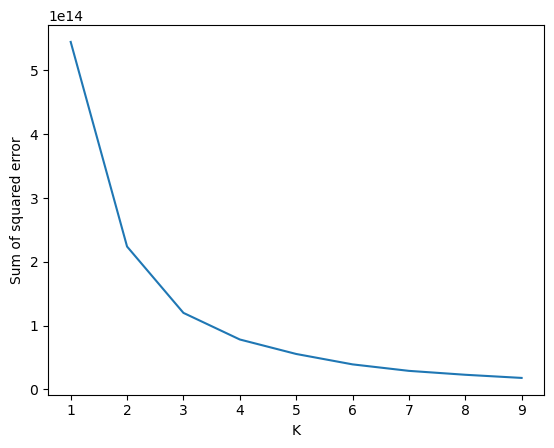

In [47]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [51]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,cluster
0,39,7,77516,9,13,4,1,1,4,1,40,2
1,50,6,83311,9,13,2,4,0,4,1,13,1
2,38,4,215646,11,9,0,6,1,4,1,40,2
3,53,4,234721,1,7,2,6,0,2,1,40,1
4,28,4,338409,9,13,2,10,5,2,0,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,36,2
48838,64,4,321403,11,9,6,10,2,2,1,40,1
48839,38,4,374983,9,13,2,10,0,4,1,50,0
48840,44,4,83891,9,13,0,1,3,1,1,40,1
